## The Z-Score

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import display

In [16]:
customers = pd.read_csv('data/Wholesale_customers_data.csv')
customers.Region = customers.Region.astype('category')
customers.Channel = customers.Channel.astype('category')
customer_features = customers.select_dtypes([int])

display(customers.info())
display(customers.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null category
Region              440 non-null category
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: category(2), int64(6)
memory usage: 21.6 KB


None

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### The Normal Distribution

---

The normal distribution is arguably the most commonly used distribution in all of statistics. **Normality** is an assumption that underlies many statistical tests and serves as a convenient model for the distribution of many (but not all!) variables.

The normal distribution relies on two parameters: 
- The population mean
- The population standard deviation 

If a variable follows a Normal distribution exactly, its mean, median, and mode will all be equal.

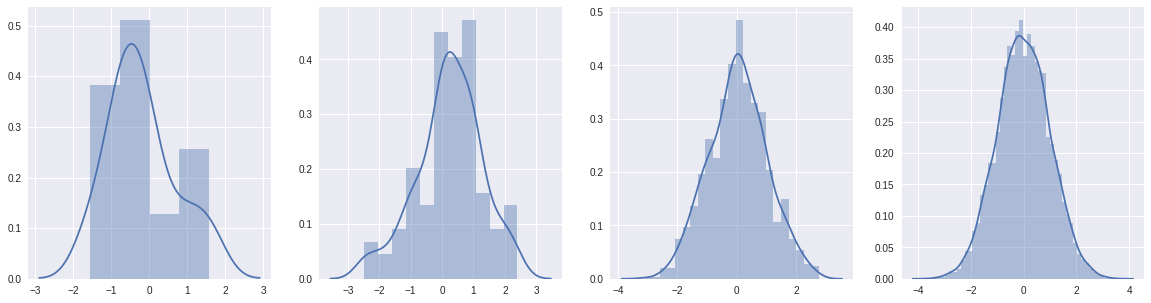

In [8]:
fig = plt.figure(figsize=(20,5))

for i in range(1,5):
    yy = np.random.normal(size=10**i)
    fig.add_subplot(1,4,i)
    sns.distplot(yy)

<a id='zdist-rule'></a>

#### The 68-95-99.7 Rule

---

It is often beneficial to identify how extreme (or far away from the expected value) a particular observation is within the context of a distribution. 

It is possible to show that, for a Normal distribution:
- 68% of observations from a population will fall within $\pm 1$ standard deviation of the population mean.
- 95% of observations from a population will fall within $\pm 2$ standard deviations of the population mean.
- 99.7% of observations from a population will fall within $\pm 3$ standard deviations of the population mean.

**Below is a visual representation of the 68-95-99.7 rule on the Delicatessen distribution:**

(-5000, 20000)

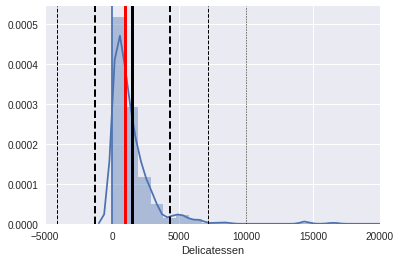

In [12]:
sns.distplot(customers.Delicatessen)
plt.axvline(customers.Delicatessen.mean(), color='black', lw=3)
plt.axvline(customers.Delicatessen.median(), color='red', lw=3)
plt.axvline((customers.Delicatessen.mean() - customers.Delicatessen.std()),
            color='black', lw=2, ls="dashed")
plt.axvline((customers.Delicatessen.mean() + customers.Delicatessen.std()),
            color='black', lw=2, ls="dashed")
plt.axvline((customers.Delicatessen.mean() + 2*customers.Delicatessen.std()),
            color='black', lw=1, ls="dashed")
plt.axvline((customers.Delicatessen.mean() - 2*customers.Delicatessen.std()),
            color='black', lw=1, ls="dashed")
plt.axvline((customers.Delicatessen.mean() + 3*customers.Delicatessen.std()),
            color='black', lw=.5, ls="dashed")
plt.axvline((customers.Delicatessen.mean() - 3*customers.Delicatessen.std()),
            color='black', lw=.5, ls="dashed")
plt.axvline(0)
plt.xlim(-5000,20000)

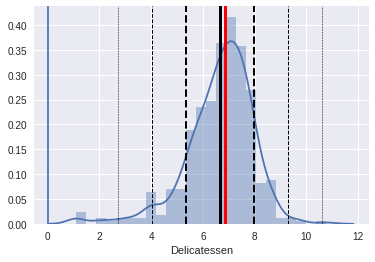

In [11]:
sns.distplot(np.log(customers.Delicatessen))
plt.axvline(np.log(customers.Delicatessen).mean(), color='black', lw=3)
plt.axvline(np.log(customers.Delicatessen).median(), color='red', lw=3)
plt.axvline((np.log(customers.Delicatessen).mean() - np.log(customers.Delicatessen).std()),
            color='black', lw=2, ls="dashed")
plt.axvline((np.log(customers.Delicatessen).mean() + np.log(customers.Delicatessen).std()),
            color='black', lw=2, ls="dashed")
plt.axvline((np.log(customers.Delicatessen).mean() + 2*np.log(customers.Delicatessen).std()),
            color='black', lw=1, ls="dashed")
plt.axvline((np.log(customers.Delicatessen).mean() - 2*np.log(customers.Delicatessen).std()),
            color='black', lw=1, ls="dashed")
plt.axvline((np.log(customers.Delicatessen).mean() + 3*np.log(customers.Delicatessen).std()),
            color='black', lw=.5, ls="dashed")
plt.axvline((np.log(customers.Delicatessen).mean() - 3*np.log(customers.Delicatessen).std()),
            color='black', lw=.5, ls="dashed")
plt.axvline(0)

### Definition: z-score


The z-score of an observation quantifies how many standard deviations the observation is away from the population mean:

#### $$ z_i = \frac{x_i - \text{population mean of x}}{\text{standard deviation of x}} $$


In [17]:
customer_feature_z_scores = (customer_features -  customer_features.mean())/customer_features.std()

In [21]:
np.random.seed(42)
sample = customer_feature_z_scores.sample(4)
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
265,-0.481627,2.402416,0.604822,1.459021,-0.430276,0.748599
78,-0.097594,-0.626156,-0.619191,-0.201029,-0.541227,-0.481496
347,1.216044,0.188030,0.458765,-0.054161,0.364841,-0.178316
255,1.550818,-0.719105,-0.679382,0.035032,-0.581078,-0.322637


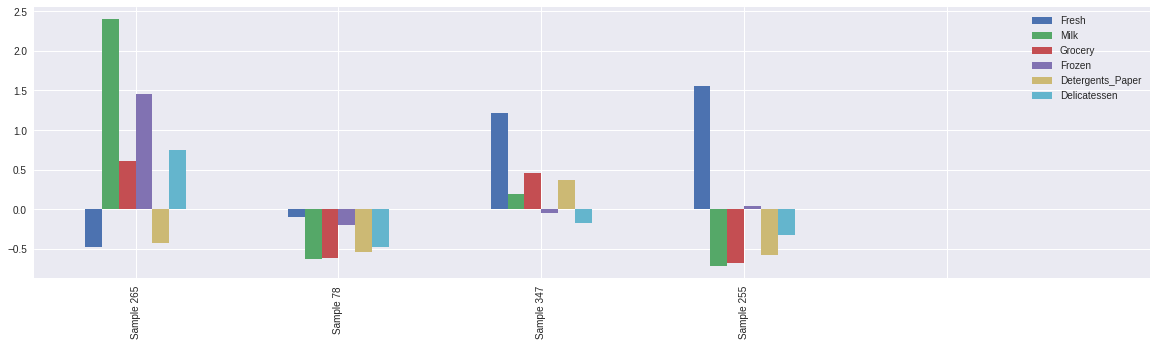

In [22]:
sample.plot(kind='bar', figsize=(20,5))
labels = ["Sample {}".format(i) for i in sample.index]
plt.xticks(range(sample.shape[0]+2),labels);